In [10]:
from joblib import load, dump
import pandas as pd

In [11]:
vectorizer = load('../models/tfidf_vectorizer.joblib')
svd = load('../models/truncated_svd.joblib')

In [12]:
normal_log = pd.read_csv('../data/merge/normal.csv')
vectorized_normal_log = vectorizer.transform(normal_log['Content'])
reduced_normal_log = svd.transform(vectorized_normal_log)

In [16]:
from sklearn.cluster import HDBSCAN

hdb = HDBSCAN(
    min_cluster_size=10, 
)

hdb.fit(reduced_normal_log)

,min_cluster_size,10
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,None
,metric,'euclidean'
,metric_params,None
,alpha,1.0
,algorithm,'auto'
,leaf_size,40
,n_jobs,None
,cluster_selection_method,'eom'


In [17]:
dump(hdb, '../models/hdbscan_model.joblib')

['../models/hdbscan_model.joblib']

In [27]:
normal_log[hdb.labels_ == -1]

,LineId,Logfile,Date,Time,Pid,Level,Component,Context,Content,EventId,EventTemplate,ParameterList,Label
3822,56924,nova-compute.log.1.2017-05-17_12:02:35,2017-05-16,22:16:50.825,2931,ERROR,oslo_service.periodic_task,req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - -...,Error during ComputeManager._run_image_cache_m...,f5c027b5,Error during ComputeManager._run_image_cache_m...,[],0
8578,27179,nova-compute.log.1.2017-05-16_13:55:31,2017-05-16,03:19:45.356,2931,ERROR,oslo_service.periodic_task,req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - -...,Error during ComputeManager._run_image_cache_m...,f5c027b5,Error during ComputeManager._run_image_cache_m...,[],0
19370,123157,nova-api.log.1.2017-05-17_12:02:19,2017-05-17,06:25:03.046,25749,CRITICAL,keystonemiddleware.auth_token,req-abcdb287-429c-40a5-8e79-d490d4fb7410 113d3...,Unable to validate token: Failed to fetch toke...,c28159fd,Unable to validate token: Failed to fetch toke...,[],0
22236,34763,nova-compute.log.1.2017-05-17_12:02:35,2017-05-16,19:33:00.935,2931,ERROR,oslo_service.periodic_task,req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - -...,Error during ComputeManager._run_image_cache_m...,f5c027b5,Error during ComputeManager._run_image_cache_m...,[],0
25134,72974,nova-compute.log.1.2017-05-17_12:02:35,2017-05-17,00:15:06.352,2931,ERROR,oslo_service.periodic_task,req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - -...,Error during ComputeManager._run_image_cache_m...,f5c027b5,Error during ComputeManager._run_image_cache_m...,[],0
57414,52286,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,06:25:02.867,25746,ERROR,keystonemiddleware.auth_token,req-1cc7d50c-25a2-46b0-a668-9c00f589160c 113d3...,Bad response code while validating token: 503,7ca28619,Bad response code while validating token: <*>,['503'],0
67001,10142,nova-compute.log.1.2017-05-17_12:02:35,2017-05-16,16:30:35.360,2931,ERROR,oslo_service.periodic_task,req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - -...,Error during ComputeManager._run_image_cache_m...,f5c027b5,Error during ComputeManager._run_image_cache_m...,[],0
75599,123155,nova-api.log.1.2017-05-17_12:02:19,2017-05-17,06:25:03.044,25749,ERROR,keystonemiddleware.auth_token,req-abcdb287-429c-40a5-8e79-d490d4fb7410 113d3...,Bad response code while validating token: 503,7ca28619,Bad response code while validating token: <*>,['503'],0
90975,114975,nova-compute.log.1.2017-05-17_12:02:35,2017-05-17,05:24:15.342,2931,ERROR,oslo_service.periodic_task,req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - -...,Error during ComputeManager._run_image_cache_m...,f5c027b5,Error during ComputeManager._run_image_cache_m...,[],0
105514,52287,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,06:25:02.868,25746,WARNING,keystonemiddleware.auth_token,req-1cc7d50c-25a2-46b0-a668-9c00f589160c 113d3...,"Identity response: <!DOCTYPE HTML PUBLIC ""-//I...",d2af8f01,"Identity response: <!DOCTYPE HTML PUBLIC ""-/<*...","['/IETF//DTD', '2.0', '/EN"">']",0


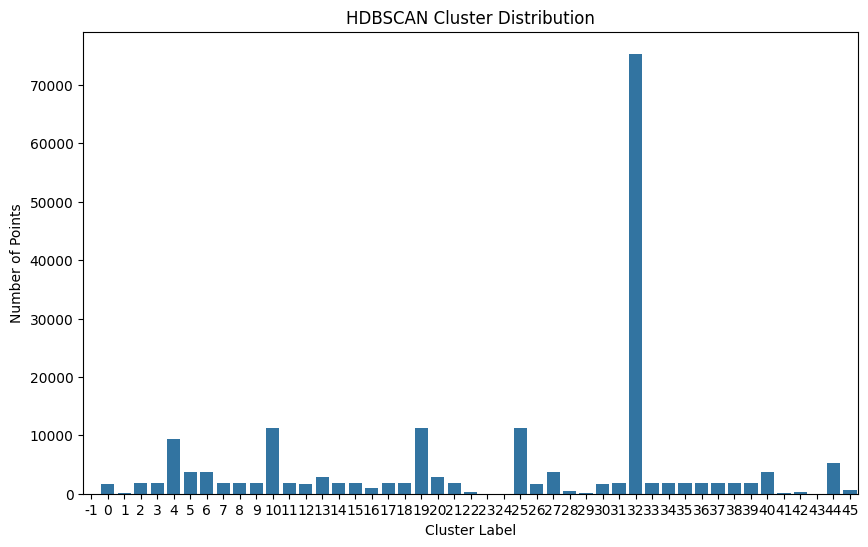

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x=hdb.labels_)
plt.title('HDBSCAN Cluster Distribution')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.show()